![cao](img/cao.png)

<br>

# CAO Points Analysis

[Official CAO Website](https://www.cao.ie/)

***

## Overview
***

This notebook analyses the CAO points from the last three years by converting the following: 


- 2021 points from http into a dataframe.

- 2020 points from an excel spreadsheet into another dataframe.

- 2019 points from a pdf into a dataframe. 



Then I combine all three points into one dataframe for analysis. 

<br>

## Importing modules
***

### Regular Expressions
Regular expression also known as [regexes](https://realpython.com/regex-python/) are special sequence of characters that are used to form a search pattern. In other words, a user can use a regular expression to search through a particular file in order to find that particular pattern or sequence. Python has a built-package for regular expressions called "[re](https://docs.python.org/3/library/re.html)". 


### Requests
This is another built-in package in python. [Requests](https://www.pythonforbeginners.com/requests/using-requests-in-python) is imported to allow a user to send HTTP/1.1 requests. To put it simply, this module contains various functions and operations that allow the user to retrieve data from a http. 


### Datetime
The [datetime module](https://www.geeksforgeeks.org/python-datetime-module/) is imported when working with dates and times. There are six main categories in this module:

1. date - used for year, month or day.


2. time - used for hours, minutes, seconds, microseconds, and tzinfo.


3. datetime - is a combination of both date and time. 


4. timedelta - used to represent duration.


5. tzinfo - gives time zone information objects.


6. timezone – gives tzinfo as fixed offset from UTC. 


### Pandas
[Pandas](https://mode.com/python-tutorial/libraries/pandas/#:~:text=Pandas%20is%20a%20Python%20library%20for%20data%20analysis.&text=Pandas%20is%20built%20on%20top,NumPy%27s%20methods%20with%20less%20code.) is another python library used for data analysis. It uses dataframes and operations to manipulate numerical tables and time series. Pandas will be used in this notebook to store and compare the cao points from 2021, 2020 and 2019. 


### Urllib request
This is an [extensive library](https://docs.python.org/3/library/urllib.request.html) used for opening urls. Unlike the requests library, this module offers more functionality and quicker way to open and read data from urls. 



### Matplotlib pyplot
This is another python library used for data visualisation. [Matplotlib pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) is a state based interface. In other words, it keeps track of the current state and automatically updates it instead of having to assign an object. It is a convenient way for users to generate high quality plots with minimal effort. 


### Seaborn

[Seaborn](https://seaborn.pydata.org/) is another module used for data visualisation. It allows users to create attractive and informative statistical plots. While pyplot allows for a more customizable approach, [seaborn](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html#:~:text=Seaborn%20and%20Matplotlib%20are%20two,of%20packages%20for%20plotting%20data.) offers more impressive default themes with fewer commands. 

<br>

In [1]:
# For regular expressions. - ref 1.
import re

# Convenient HTTP requests - ref 4.
import requests as rq

# Dates and times. - ref 8. 
import datetime as dt

# Pandas for data frames. - ref 9.
import pandas as pd

# For downloading urls. - ref 10.
import urllib.request as urlrq

# For plotting. 
import matplotlib.pyplot as plt

# Also for plotting.
import seaborn as sns

# references to use at end!!!!!


- https://realpython.com/regex-python/


- https://realpython.com/regex-python-part-2/


- https://www.mygreatlearning.com/blog/regular-expression-in-python/


- https://docs.python-requests.org/en/latest/user/quickstart/#make-a-request


- https://howchoo.com/g/ywi5m2vkodk/working-with-datetime-objects-and-timezones-in-python


- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html


- https://stackoverflow.com/questions/16870648/python-read-website-data-line-by-line-when-available


- https://www.geeksforgeeks.org/python-urllib-module/

<br>

## Time stamp
***

Here I created a time stamp by getting the current date and time using the datetime module. Next the strftime function is used to take in the current date and time and convert it into a string using the strftime method. There are numerious formats that can be used. A list of the strftime format can be found [here](https://strftime.org/). 


In the code cell below, I take the current date and time and convert it into the following format. This will then be used as the time stamp going forward.

- %Y stands for the year as a decimal number.


- %m represents the month as a decimal number.


- %d is for the day of the month as a decimal number.


- %H gives the hour in a 24 hour clock format.


- %M is used to get the minute as a decimal number.


- %S produces the second as a decimal number.


In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
nowstr = now.strftime('%Y%m%d_%H%M%S')

<br>

# 2021 CAO Points

http://www.cao.ie/index.php?page=points&p=2021
***

This section converts the 2021 CAO points from a http link into a pandas dataframe. 

<br>

### Request the http link
***

In the code cell below, [requests.get](https://docs.python-requests.org/en/latest/user/quickstart/#make-a-request) is used to fetch the data from the selected http link. 


It is also good practice to check the http respone. This is done by call `resp`. As you can see the returned respone is 200 which means the request was successful. A list of different response codes can be found [here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)


In [3]:
# Fetch the 2021 CAO points URL - ref 4.
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Check response. 200 means OK. 401 means error. 
resp

<Response [200]>

<br>

### Save origional data set
***

Here I use the time stamp I created above to open a file path for the origional http data. It will be stored in the data folder in this repository and the time stamp is used in the filename in order to keep track of the data each time the code is run in case an error ever occurs. 


In [4]:
# Create a file path for the original data.
pathhtml = 'data/cao2021_' + nowstr + '.html'

<br>

### Error on server
***

[Encoding](https://stackoverflow.com/questions/4657416/difference-between-encoding-and-encryption) is used to transfer data in a safe way so that it can be used on different systems. The encoding on my machine may differ from anothers which is why we need to decode using the method of that particular server.


The server says we should decode as per:

```Content-Type: text/html; charset=iso-8859-1```


However, an error occured. One of the lines uses \x96 which isn't defined in iso-8859-1. This error was referring to a fada in one of the Irish course names. 


Therefore, we need to use a similar decoding standard [cp1252](https://en.wikipedia.org/wiki/Windows-1252#:~:text=Windows%2D1252%20or%20CP%2D1252,Spanish%2C%20French%2C%20and%20German.) instead. This encoding method includes characters from the Latin alphabet which would include fadas. 

In [5]:
# The server uses the wrong encoding.
original_encoding = resp.encoding

# Change encoding here. 
resp.encoding = 'cp1252'

<br>

Using a [with statement](https://www.pythonforbeginners.com/files/with-statement-in-python) here to open file created above and write the above request to that file. 

In [6]:
# Open and write origional http data to file.
with open(pathhtml, 'w') as f:
    f.write(resp.text)

<br>

### Regular Expressions
***

Using a regular expression here to select the desired lines within the http file.  This [blog](https://www.mygreatlearning.com/blog/regular-expression-in-python/) gives very clear explaination of characters used when working with regular expressions. In the code cell below:


- [re.compile](https://www.tutorialspoint.com/Why-do-we-use-re-compile-method-in-Python-regular-expression) collects a regular expression pattern into pattern objects. 


- The [r](https://developers.google.com/edu/python/regular-expressions#:~:text=The%20%27r%27%20at%20the%20start,needs%20this%20feature%20badly!) at the start of the regular expression below refers to the start of the pattern string. 


- The letters or numbers inside the square brackets set what you are searching for. 


- The number within the braces set the amount of characters to search for.  


- An important note here is the use of two blank spaces as part of this regualr expression. If these characters were not added then the expression would not work correctly.


- Finally, the full stop look for any character, except for a new line and the asterisk looks to match the preceding characters zero or more times.  


In [7]:
# Compile the regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)')

<br>

### Loop through the lines of the response
***

This funciton is used to seperate the points from the # and * characters and then store them in an array. 

- First the variable portfolio is created for the # characters. The origional http file told us that # represents if there was a entry test, interview, portfolio or audition for the course. An [if statement](https://www.w3schools.com/python/python_conditions.asp) is used in this function to see if any value is equal to the # symbol and then stores it in the portofio variable. 


- Next the random variable checks for * characters. This informs us that not all on this points score were offered places.


- Finally the [isdigit](https://www.w3schools.com/python/ref_string_isdigit.asp) function is used to check if any of the characters in the text are digits and stores them in the points variable. 


In [8]:
# Creating a function to seperate and add points # and * to an array.
def points_to_array(s):
    portfolio = ''
    if s[0] == '#':
        portfolio = '#'
        
    random = ''
    if s[-1] == '*':
        random = '*'
        
    points = ''
    
    for i in s:
        if i.isdigit():
            # not addition but linking these two things together 
            points = points + i 
            
    return[points, portfolio, random]


In [9]:
# Creating a path for new 2021 points as a csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv' 

<br>

In the code cell below:

- [iter_lines](https://stackoverflow.com/questions/16870648/python-read-website-data-line-by-line-when-available) is a function in the requests library which reads the data line by line. It is better to take small bits of data at a time in to avoid losing anything. 


- [fullmatch](https://www.geeksforgeeks.org/re-fullmatch-function-in-python/) returns a match object if the whole string matches the regular expression pattern. 


- [strip](https://www.w3schools.com/python/ref_string_strip.asp) is used to remove spaces or characters either a the beginning or the end of a string. So far the first five values are assigned to the course_code variable. Next the strip function is used to extract characters from the seventh value up until the fifty seventh value and this is set to the course_title. 


- [re.split](https://stackoverflow.com/questions/12683201/python-re-split-to-split-by-spaces-commas-and-periods-but-not-in-cases-like) returns a list where the string is split at each match. In other words, the points are split using the regular expression and the plus symbol will match one or more of that pattern. So this splits the points into round 1 and round 2. 


- [len](https://www.w3schools.com/python/ref_func_len.asp) is used to check if the length of the course list is not equal to two then only return first two values. 

<br>

Now the amended 2021 points with only the information I want is written to a new csv file that can be used for analysis.

In [10]:
# Keeps track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row for columns.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    
    # Loop through lines of the response - ref 6.
    for line in resp.iter_lines():
        
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            
            # Add one to the lines counter.
            no_lines = no_lines + 1
            
            #extract first 5 characters for course codes.
            course_code = dline[:5]
            
            # strip everything before 7  and after 57
            course_title = dline[7:57].strip()
            
            #course_round1 = dline[60:]
            #print(f"'{course_code} {len(dline)}'")
            
            course_points = re.split(' +', dline[60:])
            #print(f"'{course_code} {course_points}'")
            
            # if the length of points is not equal to 2 only return first 2 values. 
            if len(course_points) != 2:
                
                # prints out line which contains 3 course points. 
                # print(f"'{course_code} {course_points}'")
                
                course_points = course_points[:2]
                
            # join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')
               
# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")


Total number of lines is 949.


<br>

**NB**: It was verified as of 03/12/21 that there were 949 courses exactly on the CAO 2021 points list. 

<br>

Finally, the last step in obtaining the 2021 cao points is to assign path2021 to a pandas data frame: df2021. Now the 2021 points are ready for analysis

<br>

In [11]:
# Assign variable and read new dataframe.
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [12]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


***

<br>

# 2020 CAO Points

http://www.cao.ie/index.php?page=points&p=2020

***

This section converts the 2020 CAO points from an excel file into a pandas dataframe. 

<br>

### Save origional data set

***

Once again the time stamp is used here when saving the origional excel file to my data folder in this repository. The urllib requests function [urlretrieve](https://programmer.ink/think/how-to-use-urlretrieve-in-python-3.html) is used here to download this remote excel file to my local machine. 

In [13]:
# Create variable for url.
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [14]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [15]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20211208_161119.xlsx',
 <http.client.HTTPMessage at 0x1fb1e7bb400>)

<br>

### Load Excel Spreadsheet using Pandas

***

Similar to the 2021 points, I have given the 2020 points the variable name df2020 and will load the origional data to this dataframe for analysis. 

In [16]:
# Download and break down the excel spreadsheet.
df2020 = pd.read_excel(url2020, skiprows=10)

In [17]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Spot check a random row.
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [19]:
# Spot check the last row.
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

<br>

In the below code cells I use the [pandas.to.csv](https://www.geeksforgeeks.org/python-pandas-series-to_csv/) method which is a useful function that writes a varibale to a csv file using commas to seperate the values. In this case we are writing the 2020 dataframe to the data folder using the time stamp again. Now the 2020 points are ready for analysis.

In [20]:
# Create a file path for the pandas dataframe.
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [21]:
# Save new df to data folder in repo.
df2020.to_csv(path2020)

 <br>

# 2019 CAO Points

http://www.cao.ie/index.php?page=points&p=2019

***   

This section converts the 2019 CAO points from a pdf file into a pandas dataframe. 


### Steps for conversion:

1.  Download original pdf file from the link above.
2.  Open original pdf file in Microsoft Word.
3.  Save Microsoft Word's converted PDF in docx format.
4.  Re-save Word document for editing.
5.  Delete headers and footers.
6.  Delete preamble on page 1.
7.  Select all and copy.
8.  Paste into [Visual Studio Code](https://www.videostudiopro.com/en/?link=wm).
9.  Remove HEI name lines and any black lines.
10. Change column heading "COURSE AND INSTITUTION" to "Course".
11. Change backticks to apostrophes.
12. Replace double tab charater on line 28 with just a single tab.
13. Delete tabs at end of lines 604, 670, 700, 701, 793, and 830.
14. Finally save as a csv file in the data folder of this repository. 

<br>

Now this csv file is ready to be loaded into a pandas dataframe named df2019.

In [22]:
df2019 = pd.read_csv('data/cao2019_20211103_202410_edited.csv', sep='\t')

In [23]:
df2019

,Course Code,Course,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


<br>

At first sight we can see that the 2019 dataframe doesn't contain round 1 or round 2 points like 2020 or 2021 files do. There are two points columns

- EOS means end of season points. 


- MID means mid points a student had who got accepted to the course.


This is something that will need to be considered in the analysis. 

<br>

***

<br>

# Concat
https://pandas.pydata.org/docs/reference/api/pandas.concat.html

***

This section will take the 2021, 2021 and 2019 courses, link and join them together into one dataframe for analysis. 

### Creating column headings

First step is to create a new dataframe for 2021 points with two headings. 

In [24]:
# Creating a new variable for 2021.
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


Next step is to create a new dataframe for 2020 and 2019 points with the same two headings as 2021. 

In [25]:
# Create new variable for 2020.
courses2020 = df2020[['COURSE CODE2','COURSE TITLE']]
# Set column headings to be the same as 2021.
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [26]:
# Create new variable for 2019.
courses2019 = df2019[['Course Code','Course']]
# Set column headings to be the same as 2021.
courses2019.columns = ['code', 'title']
courses2019

,code,title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


### Concat 2021, 2021 and 2019

Now the next step is to concatenate these varibales. This is done using the pandas function [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html). To put it simply, this will take the 2020 and 2019 points and put them on top of the 2021 points. I am using the ignore index parameter for this function as pandas automatically gives an index on it's dataframes and it allows for clean lines when sorting for duplicates. 

### Sort by course code

Pandas has another useful function called [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) which does exactly that. In the cell below I am sorting the code values in order to find any duplicates in the concatenated dataframe. 

In [27]:
# Concat two variables ignoring the index. 
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [28]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2581,AC120,International Business
950,AC137,Liberal Arts
2582,AC137,Liberal Arts
...,...,...
2412,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
3342,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education



Here I use the pandas function [loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) to check display the duplicate course on two different index'. 


In [29]:
allcourses.loc[175]['title']

'International Business'

In [30]:
allcourses.loc[949]['title']

'International Business'

### Find and remove duplicates

Pandas has yet another useful function called [duplicated](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html). This function sieves through the selected dataframe and returns any duplicated rows. Furthermore, pandas has another function which will remove any duplicated rows. This is called [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates).

In [31]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


In [32]:
# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3281,TL801,Animation Visual Effects and Motion Design
3282,TL802,"TV, Radio and New Media"
3283,TL803,Music Technology
3286,TL812,Computing with Digital Media


### Find and remove duplicates using course code

An important note here is that the 2021 and 2020 formats might differ. Therefore, it is fair to say that some course titles might have been written using differnet syntax and may not have been picked up in the previous arguments. However, the course code seems to have the exact same format. 


Luckily, there is a way to check and remove duplicates based on the course code alone. This is done by passing the subset parameter which will only consider the data in the selction column, find duplicates and remove them. 

In [33]:
# Finds duplicates in code column.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3338,WD200,Arts (options)
3339,WD210,Software Systems Development
3340,WD211,Creative Computing
3341,WD212,Recreation and Sport Management


<br>

In the function below, I pass in two other parameters. 

- inplace=True will drop the duplicates making the change permament. 


- ignore_index=True will ignore the index' of the origional arrays and basically re-sets the index on the new dataframe. 

In [34]:
# Returns new dataframe with duplciates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [35]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1646,SG441,Environmental Science
1647,SG446,Applied Archaeology
1648,TL803,Music Technology
1649,TL812,Computing with Digital Media



Now the variable allcourses is a dataframe with the combined 2021, 2020 and 2019 courses code and titles. 


<br>

# Join to points

***

Now that the 2021 and 2020 courses have been combined, the next step is to join the points to the datframe. 

### Setting index and columns for df2021

Instead of having dataframes with different index' it is a better idea to set the course code as the index. This is done by using the function [set_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) which permanently makes the code column the index of the dataframe. 

Now that the index is set we need to add the columns to the 2021 dataframe. This is done by using the [columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) function. When setting the column headings it is important to use the heading names as they were in the origional dataframe. 

In [36]:
# Set index and columns for 2021. 
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


<br>

### Join 2021 points to allcourses dataframe

Next we join the 2021 points to the new dataframe containing the course codes from both 2021 and 2020. This is done by using the [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) function and selecting just the round 1 points.

In [37]:
# Set the index again.
allcourses.set_index('code', inplace=True)
# Join the df data to column. 
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


### Extract 2020 round 1 points

Now that the allcourses dataframe contains the 2021 points we need to add the 2020 points as well. This is done using the same format as above. First we need to extract the round 1 points and then set the column name to the same syntax as the previous one. 

In [38]:
# Set 2020 round 1 points to new variable.
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


### Setting index for 2020 round 1 points

Similar to the 2021 dataframe, the index needs to be set to the course code again so that the correct 2020 points are assigned to the correct course in the new dataframe. 

In [39]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


### Join 2020 round 1 points to allcourses

The next step is to use the pandas joing function again to add the 2020 round 1 points to the allcourses dataframe which already contains the 2021 points. 


In [40]:
# Join 2020 R1 points to allcourses.
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


### Extract 2019 EOS points

As the origional 2019 CAO PDF only contains end of season figures, we will use this to compare with 2021 and 2020. 

In [41]:
# Set 2019 eos points to new variable.
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


### Setting index for 2019 points

I need to set the index to the code code and I did with the 2021 and 2020 points. 

In [42]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


### Join 2019 to allcourses

The final step here is to use pandas to join the 2019points to the allcourses dataframe. 

In [43]:
# Join 2019 points to allcourses.
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


As we can see the allcourses dataframe conatins 4 columns; title, points_r1_2021, points_r1_2020 and points_r1_2019.

In [44]:
# Create a file path for the pandas dataframe.
path_all = 'data/cao_allcourses_' + nowstr + '.csv'

In [45]:
# Save new df to data folder in repo.
allcourses.to_csv(path_all)

<br>

# Analysis

***

In [46]:
data = pd.read_csv(path_all)
df = pd.DataFrame(data)
df.set_index('code', inplace=True)
df

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [47]:
data['points_r1_2021']

code
AL801    300
AL802    313
AL803    350
AL805    321
AL810    328
        ... 
SG441    NaN
SG446    NaN
TL803    NaN
TL812    NaN
WD148    NaN
Name: points_r1_2021, Length: 1651, dtype: object

In [48]:
points_r1_2021 = data['points_r1_2021'].tolist()
points_r1_2020 = data['points_r1_2020'].tolist()
points_r1_2019 = data['points_r1_2019'].tolist()
title = data['title'].tolist()

In [49]:
# MOVE TO TOP OF NOTBEOOK!!!!!!!
#Using magic command to set plots to display inline.
%matplotlib inline

# Change default figure size.
plt.rcParams['figure.figsize'] = [12, 8] 

import numpy as np

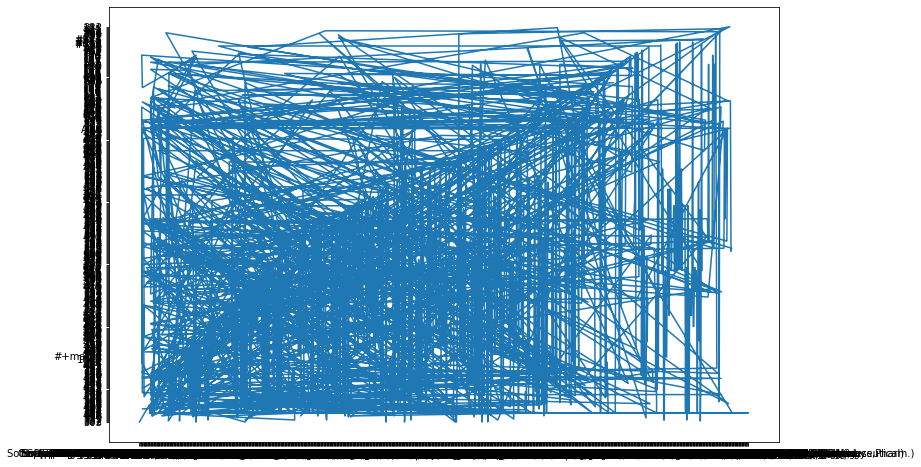

In [50]:
plt.plot(title, points_r1_2020)
plt.show()

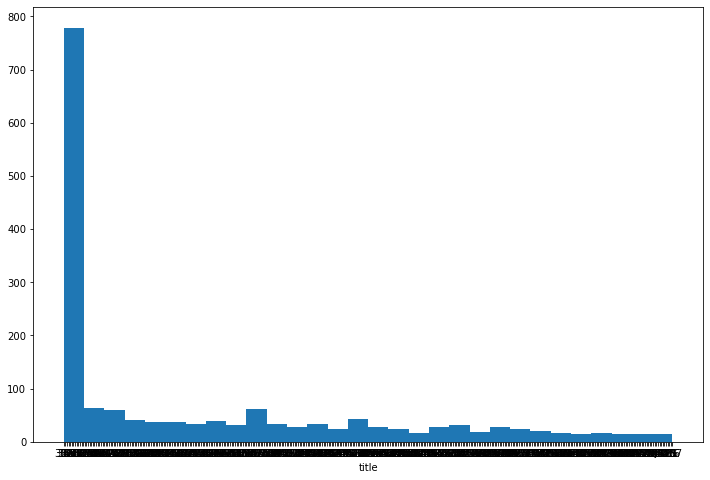

In [51]:
plt.hist(points_r1_2021, bins=30)
plt.xlabel('title')
plt.show()

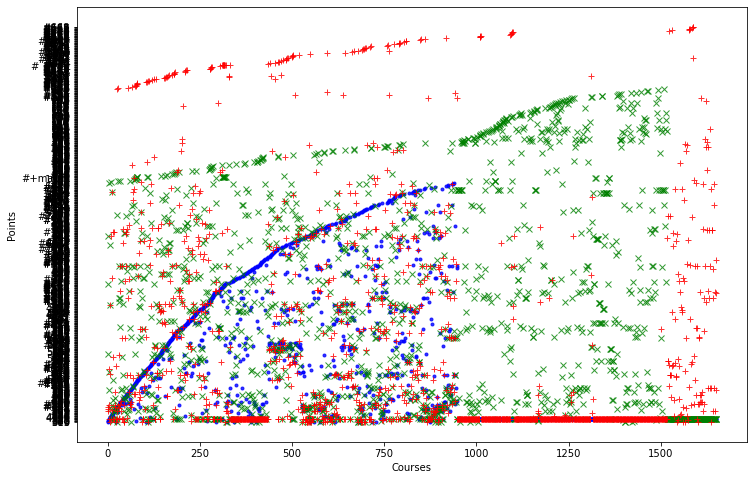

In [52]:
fig, ax = plt.subplots()

ax.plot(points_r1_2021, 'b.', alpha=0.8)

ax.plot(points_r1_2020, 'gx', alpha=0.8)

ax.plot(points_r1_2019, 'r+', alpha=0.8)

ax.set_xlabel("Courses")

plt.ylabel('Points')
plt.show()

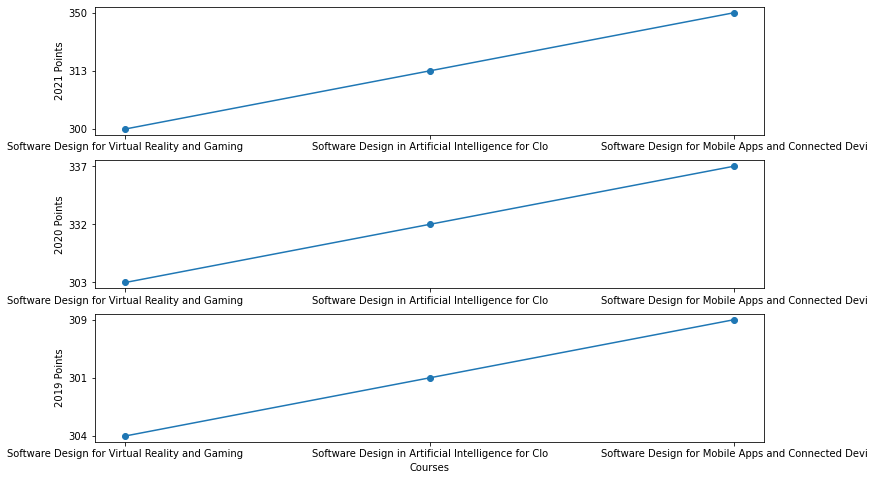

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle('')

ax1.plot(title[:3], points_r1_2021[:3],'o-')
ax1.set_ylabel('2021 Points')

ax2.plot(title[:3], points_r1_2020[:3], 'o-')
ax2.set_ylabel('2020 Points')

ax3.plot(title[:3], points_r1_2019[:3], 'o-')
ax3.set_ylabel('2019 Points')
ax3.set_xlabel('Courses')

plt.show()

In [61]:
allcourses.head()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307


In [63]:
allcourses.tail()

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264
TL812,Computing with Digital Media,NaN,NaN,369
WD148,Tourism Marketing,NaN,NaN,269


In [62]:
allcourses.describe()

,title,points_r1_2021,points_r1_2020,points_r1_2019
count,1651,928,1437,926
unique,1032,377,389,358
top,Business,300,AQA,300
freq,32,18,26,32


# TO DO


***



- MAYBE ADD PLOTS TO COMPARE DATA


- ADD CONTENT TO THE README







<br>


# This notebook should have:
 ***
 
 1. origional data file 2021,2020,2019 from cao website
 
 
2. cleaned data files x 3 again


3. merged data file with all 3 - analyse this one with plots

<br>

# References:

***
 
All references and code used in these notebooks have been sourced in Oct/Nov/Dec 2021 from the following webpages:


- https://github.com/ianmcloughlin/cao-points/blob/main/cao-points-analysis.ipynb
 
 
 
 
 
 
 
 
 
 
- https://docs.python.org/3/library/re.html


- https://realpython.com/regex-python/


- https://realpython.com/regex-python-part-2/


- https://docs.python-requests.org/en/latest/user/quickstart/#make-a-request


- https://www.mygreatlearning.com/blog/regular-expression-in-python/


- https://stackoverflow.com/questions/16870648/python-read-website-data-line-by-line-when-available


- https://sites.pitt.edu/~naraehan/python3/mbb12.html


- https://docs.python.org/3/library/datetime.html


- https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html


- https://docs.python.org/3/library/urllib.request.html


- 




<br>

***

# End